# Three variable Monte-Carlo real mass function integral

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
project_path = "/global/cfs/cdirs/des/zhou/spt_selection/"
halo_fname = 'abacus/RShalos_allprops.hdf5'
halo_path = os.path.join(project_path,halo_fname)
f = h5py.File(halo_path,'r')
halos = f['halos']
print(halos.dtype)
mass = halos['m'] 

[('id', '<i8'), ('parent_id', '<i8'), ('pos', '<f4', (3,)), ('vel', '<f4', (3,)), ('corevel', '<f4', (3,)), ('bulkvel', '<f4', (3,)), ('m', '<f4'), ('m_SO', '<f4'), ('r', '<f4'), ('child_r', '<f4'), ('vmax_r', '<f4'), ('mgrav', '<f4'), ('vmax', '<f4'), ('rvmax', '<f4'), ('rs', '<f4'), ('klypin_rs', '<f4'), ('vrms', '<f4'), ('J', '<f4', (3,)), ('energy', '<f4'), ('spin', '<f4'), ('alt_m', '<f4', (4,)), ('alt_m_SO', '<f4', (4,)), ('Xoff', '<f4'), ('Voff', '<f4'), ('b_to_a', '<f4'), ('c_to_a', '<f4'), ('A', '<f4', (3,)), ('b_to_a2', '<f4'), ('c_to_a2', '<f4'), ('A2', '<f4', (3,)), ('bullock_spin', '<f4'), ('kin_to_pot', '<f4'), ('m_pe_b', '<f4'), ('m_pe_d', '<f4'), ('halfmass_radius', '<f4'), ('num_p', '<i8'), ('num_child_particles', '<i8'), ('p_start', '<i8'), ('desc', '<i8'), ('flags', '<i8'), ('n_core', '<i8'), ('subsamp_start', '<i8'), ('subsamp_len', '<i8'), ('min_pos_err', '<f4'), ('min_vel_err', '<f4'), ('min_bulkvel_err', '<f4'), ('N', '<i4'), ('alt_N', '<i4', (4,)), ('N_SO', '<i4

In [14]:
mf_name = "data/abacus_mf.npy"
np.save(os.path.join(project_path,mf_name),mass)

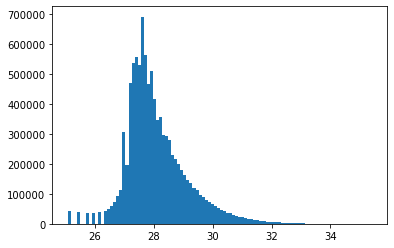

In [15]:
plt.hist(np.log(mass), bins = 100);

In [16]:
from mass_function import MassFunction

/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:19: RuntimeWarning: divide by zero encountered in log
  n = np.log(hist_data[0]) #numbers in each bin
/global/cfs/cdirs/des/zhou/spt_selection/heidicode/mass_function.py:28: RuntimeWarning: invalid value encountered in double_scalars
  slope = (n[i+1] - n[i])/(bins[i+1] - bins[i])


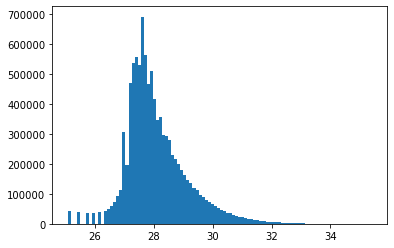

In [17]:
mf = MassFunction()

In [18]:
mf.beta(29)

array(0.99523401)

In [35]:
def square(x,y):
    return (x+y)

In [41]:
test = square((2*np.arange(9)).reshape(-1,1), (np.arange(9)+1).reshape(1,-1))
print(test)

[[ 1  2  3  4  5  6  7  8  9]
 [ 3  4  5  6  7  8  9 10 11]
 [ 5  6  7  8  9 10 11 12 13]
 [ 7  8  9 10 11 12 13 14 15]
 [ 9 10 11 12 13 14 15 16 17]
 [11 12 13 14 15 16 17 18 19]
 [13 14 15 16 17 18 19 20 21]
 [15 16 17 18 19 20 21 22 23]
 [17 18 19 20 21 22 23 24 25]]


In [40]:
(2*np.arange(9)).reshape(-1,1)

array([[ 0],
       [ 2],
       [ 4],
       [ 6],
       [ 8],
       [10],
       [12],
       [14],
       [16]])

In [38]:
 (np.arange(9)+1).reshape(1,-1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [42]:
test[1]

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
np.sum([np.sum(row) for row in test])

1053

In [44]:
[np.sum(row) for row in test]

[45, 63, 81, 99, 117, 135, 153, 171, 189]